3.通过读取外部数据构造DataFrame

In [1]:
import pandas as pd

- 文本文件: 使用read_csv或者read_table

pd.read_table(filepath_or_buffer, sep='\t', header='infer', names=None, index_col=None, use_cols=None, dtype=None, converters=None,
              skiprows=None, skiptfooter=None, nrows=None, na_values=None, skip_blank_lines=True, parse_dates=False, thousands=None,
              comment=None, encoding=None)
- filepath_or_buffer: 文件的路径
- sep:分隔符，默认为tab，即 \t
- header: 表头，默认使用数据的第一行作为列名
- names: 指定数据的表头
- index_col: 指定索引列
- usecols: 指定需要读取的列，读取的结果是原数据的子集
- dtype: 可以指定读取时每一列相应的数据类型
- converters: 通过字典格式，为原数据集中的字段设置转换映射
- skiprows: 需要跳过开头的行数
- skipfooter: 需要跳过末尾的行数
- nrows: 需要读取的行数
- na_values: 指定原数据中哪些特殊值代表了缺失值
- skip_blank_lines:跳过空白行，默认是True
- parse_dates: 如果为True，则将原始数据中的列解析为时间格式。如果参数为列表，则分别解析对应的列，如果为多维列表，则合并对应的列为日期列，如果为字典，则解析字典值对应的列，命名为字典键对应的列名
- thousands：千分位符
- comment: 注释符
- encoding:编码格式

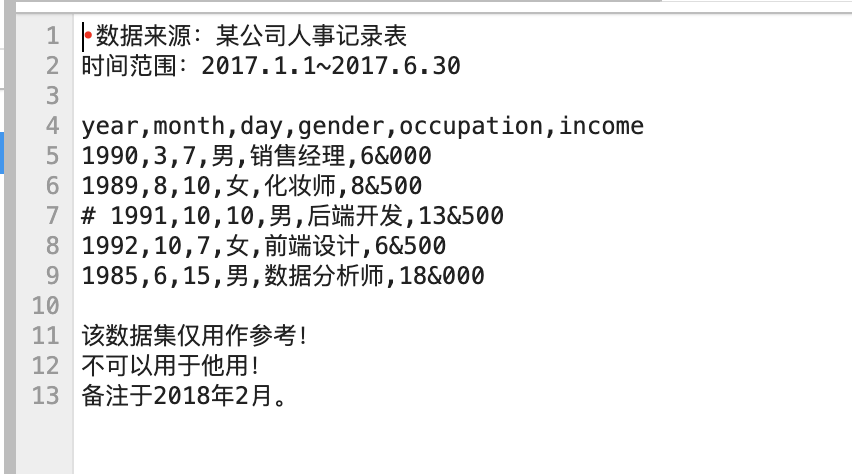

对于上面的数据，逗号分隔，前两行，最后三行是说明性的，需要跳过；第7行是注释，不需要处理。千分位符号是&，年月日分开存储，可以合并为一个字段，中文可能有编码问题，这些都可以通过上面的参数解决

In [3]:
user_income = pd.read_table('data_test01.txt', 
                           sep=',',
                           skiprows=2,
                           skip_blank_lines=True,
                           skipfooter=3,
                           comment='#',
                           thousands='&',
                           parse_dates={'birth': [0, 1, 2]},
                           encoding='utf-8')
user_income

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,birth,gender,occupation,income
0,1990-03-07,男,销售经理,6000
1,1989-08-10,女,化妆师,8500
2,1992-10-07,女,前端设计,6500
3,1985-06-15,男,数据分析师,18000


对于read_excel函数的大部分参数和read_table类似。书上提到不需要注意的有：
- sheetname
- converters
- convert_float
可以使用data_test